<a href="https://colab.research.google.com/github/FatimaKhallifa/Image_Generation-GenerativeAI/blob/main/Generating_images_from_text_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Generative AI Image Generation with Stable Diffusion
### This project demonstrates how to use Stable Diffusion (v2.1) to generate and explore AI-created images from text prompts.

---




In [1]:
import torch

# Check if CUDA (GPU) is available
torch.cuda.is_available()



True

In [2]:
!pip install diffusers transformers accelerate scipy safetensors
!pip install --upgrade diffusers


In [3]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import os

pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


## Prompt exploration

a. Generate 3 images with original prompts

In [10]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
import os

# BONUS: Create output folder if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# BONUS: Load Stable Diffusion 2.1 with a custom scheduler (DPMSolver)
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# Your prompts
prompts = [
    "A rainy forset with so many very tall trees  with a river in the middle and mud around it.",
    "a filed with a beautiful sky and yellow small flowers at sunset time.",
    "An Old fishing and traveling ship in the middle of the ocean during sunset painting in a frame ."
]

for i, prompt in enumerate(prompts, start=1):
    image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

    # Save image
    filename = f"outputs/prompt{i}.png"
    image.save(filename)
    print(f"Saved image: {filename}")

    # BONUS: Save prompt text
    prompt_filename = f"outputs/prompt{i}.txt"
    with open(prompt_filename, "w") as f:
        f.write(prompt)
    print(f"Saved prompt text: {prompt_filename}")



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: outputs/prompt1.png
Saved prompt text: outputs/prompt1.txt


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: outputs/prompt2.png
Saved prompt text: outputs/prompt2.txt


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: outputs/prompt3.png
Saved prompt text: outputs/prompt3.txt


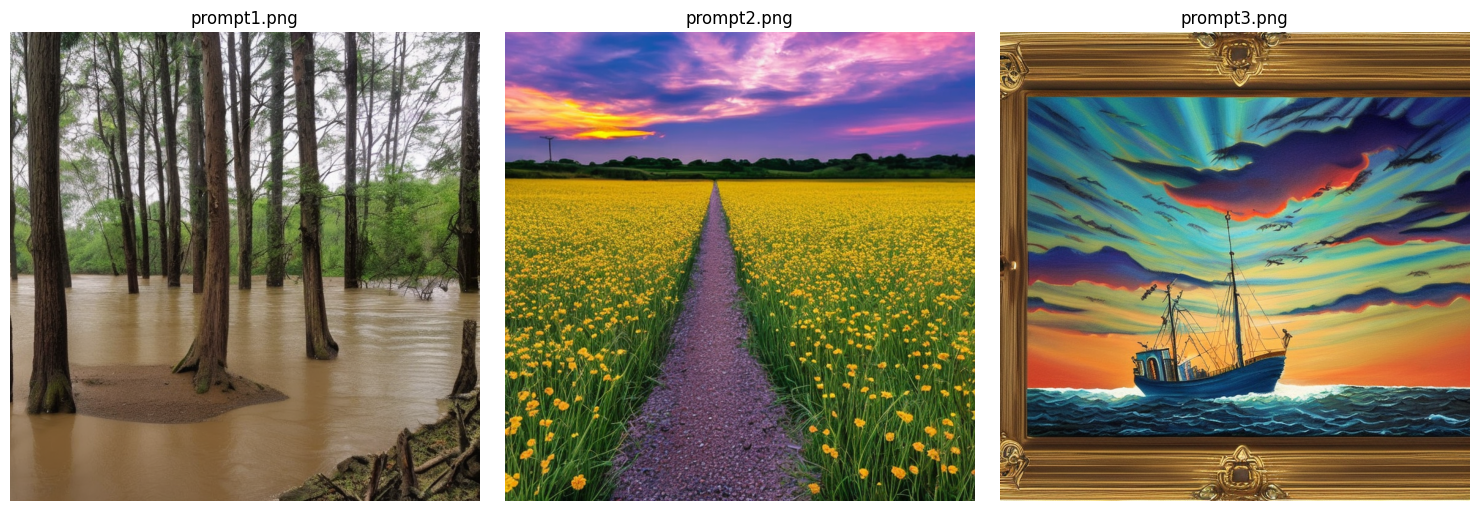

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

folder_path = 'outputs'

image_names = ['prompt1.png', 'prompt2.png', 'prompt3.png']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, image_name in enumerate(image_names):
    img_path = os.path.join(folder_path, image_name)
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(image_name)

plt.tight_layout()
plt.show()

b. Re-run the demonstration cell (astronaut on a horse)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Saved: astronaut_on_horse.png


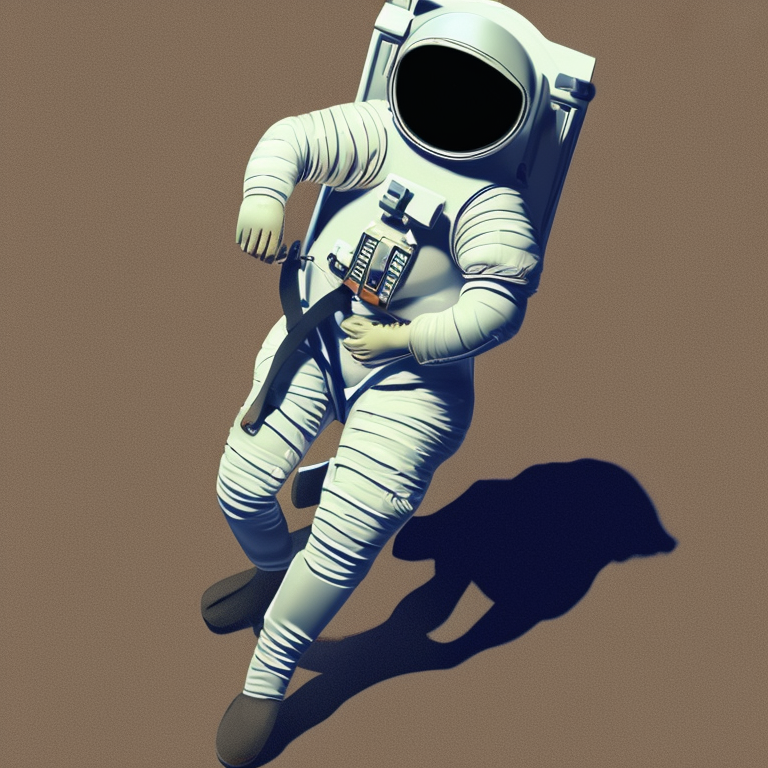

In [6]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch

# BONUS: Load Stable Diffusion 2.1 with a custom scheduler (DPMSolver)
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# Your prompt
prompt = "An astronaut riding a horse in a photorealistic style"

# Generate image
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

# Save the image
image.save("astronaut_on_horse.png")
print("Saved: astronaut_on_horse.png")
# Display the image
display(image)

# 3 - Parameter Sweep
a. Pick one favorite prompt

In [7]:
prompt = "A rainy forset with so many very tall trees  with a river in the middle and mud around it."


b. Generate four versions with the following combinations:

In [8]:
import torch
from diffusers import StableDiffusionPipeline

# Load the Stable Diffusion 2.1 model
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)
pipe.to("cuda")  # Assuming you're using a GPU, otherwise use 'cpu'

# Set seed for reproducibility
seed = 1024
generator = torch.manual_seed(seed)

# Define param combinations
param_combinations = [
    {"guidance_scale": 7.5, "num_inference_steps": 25, "filename": "sweep_1.png"},
    {"guidance_scale": 7.5, "num_inference_steps": 75, "filename": "sweep_2.png"},
    {"guidance_scale": 5.0, "num_inference_steps": 50, "filename": "sweep_3.png"},
    {"guidance_scale": 10.0, "num_inference_steps": 50, "filename": "sweep_4.png"},
]

# Generate and save images
for params in param_combinations:
    image = pipe(prompt,
                 guidance_scale=params["guidance_scale"],
                 num_inference_steps=params["num_inference_steps"],
                 generator=generator).images[0]

    image.save(params["filename"])
    print(f'Saved: {params["filename"]} (guidance_scale={params["guidance_scale"]}, '
          f'inference_steps={params["num_inference_steps"]}, seed={seed})')



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Saved: sweep_1.png (guidance_scale=7.5, inference_steps=25, seed=1024)


  0%|          | 0/75 [00:00<?, ?it/s]

Saved: sweep_2.png (guidance_scale=7.5, inference_steps=75, seed=1024)


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: sweep_3.png (guidance_scale=5.0, inference_steps=50, seed=1024)


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: sweep_4.png (guidance_scale=10.0, inference_steps=50, seed=1024)


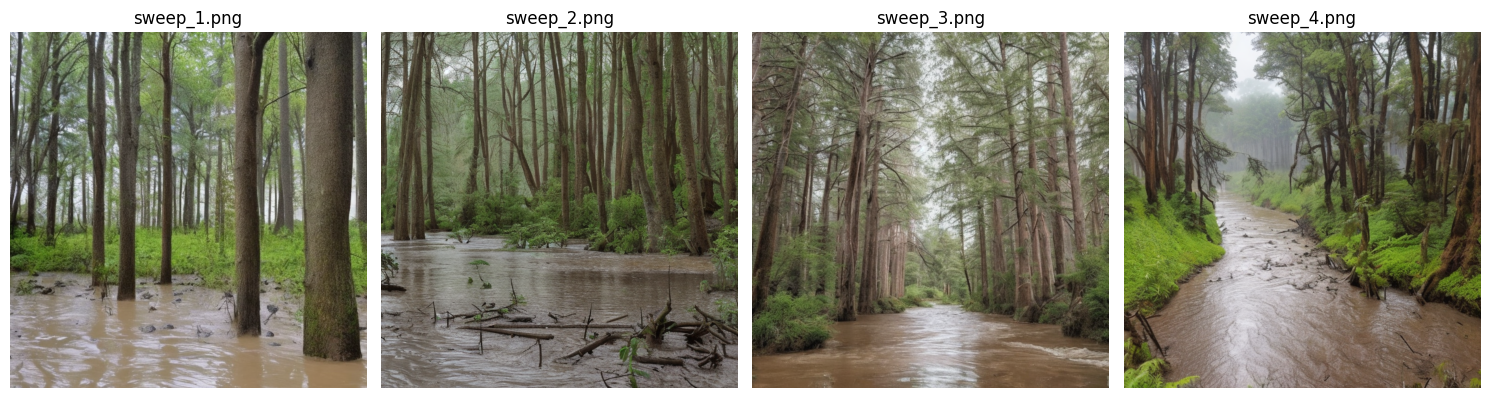

In [11]:
image_names = ['sweep_1.png', 'sweep_2.png', 'sweep_3.png','sweep_4.png']

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, image_name in enumerate(image_names):
    img = mpimg.imread(image_name)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(image_name)

plt.tight_layout()
plt.show()